# Image Handling using Python3 and OpenCV
## Install dependencies
### System dependencies
We will be using Python 3. On Debian based systems, you can use APT package manager to install Python and its package manager Pip.

In [ ]:
!echo 'password' | sudo -S apt install python3 python3-pip

### Python dependencies
Using Pip, install OpenCV and other dependencies.

In [ ]:
!echo 'password' | sudo -S pip3 install opencv-python opencv-contrib-python matplotlib

## Importing required modules
These are the modules that we need to import throughout all the examples

In [2]:
# In Python, images are stored as numpy arrays
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Image Capture
### From file
Let's start by learning how to capture from a file in disk.
####  Error checking
If the image does not exist or is not readable, then **None** will be returned instead.

In [ ]:
img_non_existing = cv2.imread('non-existing.jpg')
if None == img_non_existing:
    print("Unable to read image!")

#### Different color formats
OpenCV allows us to load and decode the image in different color formats
* cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
* cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
* cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

In [ ]:
img_color = cv2.imread('lenna.png', cv2.IMREAD_COLOR)
print(img_color.shape)
# Matplotlib needs BGR, so convert from RGB to BGR
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))

In [ ]:
img_gray = cv2.imread('barbara.jpg', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')

In [ ]:
img_orig = cv2.imread('diamond.png', cv2.IMREAD_UNCHANGED)
print(img_orig.shape)
plt.imshow(img_orig)

### From video
Similar to images, OpenCV may read frames from a video file. To do so, an video capture object is created.
#### Error checking
The video capture provides a method to check if the video could be opened.

In [ ]:
vid_non_existing = cv2.VideoCapture('non-existing.mp4')
if vid_non_existing.isOpened() == False:
    print("Error opening video stream or file")

# Release resources, even if it errored out
vid_non_existing.release()

#### Capture frames
Once the capture object is opened, we can retrieve frames from it until it is exhausted or an error occured.

In [ ]:
vid_mp4 = cv2.VideoCapture('ball.mp4')

# Iterate until there are no more frames
while(vid_mp4.isOpened()):
    # Capture frame-by-frame
    ret, frame = vid_mp4.read()
    if ret == False:
        print("End of video")
        break;
 
    plt.imshow(frame)
    plt.show()
 
vid_mp4.release()

#### Video Properties
You can query and set some properties on the video capture object such as capture size, format, etc... See [the documentation](https://docs.opencv.org/3.1.0/d8/dfe/classcv_1_1VideoCapture.html#a8c6d8c2d37505b5ca61ffd4bb54e9a7c)
* CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
* CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
* CAP_PROP_POS_AVI_RATIO Relative position of the video file: 0 - start of the film, 1 - end of the film.
* CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.
* CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.
* CAP_PROP_FPS Frame rate.
* CAP_PROP_FOURCC 4-character code of codec.
* CAP_PROP_FRAME_COUNT Number of frames in the video file.
* CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
* CAP_PROP_MODE Backend-specific value indicating the current capture mode.
* CAP_PROP_CONVERT_RGB Boolean flags indicating whether images should be converted to RGB.

In [ ]:
vid = cv2.VideoCapture('ball.mp4')

width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
print ("Queried image size is %dx%d"%(width,height))

ret, frame = vid.read()
print("Real image size is %dx%d"%(frame.shape[1], frame.shape[0]))

# Videos cannot change their size from the capture object
vid.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

ret, frame = vid.read()
print("Image size is still %dx%d"%(frame.shape[1], frame.shape[0]))
 
vid.release()

### From Camera
The same video capture object may be used to capture from a camera. If an integer is provided, it will be treated as the device number.
```python
cam = cv2.VideoCapture(deviceNumber)
```

#### Error checking
Similar to the video case, a method is provided to query if the camera was able to open.

In [ ]:
cam = cv2.VideoCapture(-1)
if cam.isOpened() == False:
    print("Error opening camera")

# Release resources, even if it errored out
cam.release()

#### Capture frames
Once the capture object is opened, frames are captured as in the video case.

In [ ]:
device = 0
cam = cv2.VideoCapture(0)
count = 10

# Iterate until there are no more frames (artifically limiting to 10 frames)
while cam.isOpened() and count > 0:
    # Capture frame-by-frame
    ret, frame = cam.read()
    if ret == False:
        print("End of video")
        break;
 
    plt.imshow(frame)
    plt.show()
    count -= 1
 
cam.release()

#### Camera properties
Cameras expose several properties such as capture size, format, etc... See [the documentation](https://docs.opencv.org/3.1.0/d8/dfe/classcv_1_1VideoCapture.html#a8c6d8c2d37505b5ca61ffd4bb54e9a7c)
* CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
* CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
* CAP_PROP_POS_AVI_RATIO Relative position of the video file: 0 - start of the film, 1 - end of the film.
* CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.
* CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.
* CAP_PROP_FPS Frame rate.
* CAP_PROP_FOURCC 4-character code of codec.
* CAP_PROP_FRAME_COUNT Number of frames in the video file.
* CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
* CAP_PROP_MODE Backend-specific value indicating the current capture mode.
* CAP_PROP_BRIGHTNESS Brightness of the image (only for cameras).
* CAP_PROP_CONTRAST Contrast of the image (only for cameras).
* CAP_PROP_SATURATION Saturation of the image (only for cameras).
* CAP_PROP_HUE Hue of the image (only for cameras).
* CAP_PROP_GAIN Gain of the image (only for cameras).
* CAP_PROP_EXPOSURE Exposure (only for cameras).
* CAP_PROP_CONVERT_RGB Boolean flags indicating whether images should be converted to RGB.
* CAP_PROP_WHITE_BALANCE Currently unsupported
* CAP_PROP_RECTIFICATION Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)

In [ ]:
device = 0
vid = cv2.VideoCapture(device)

width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
print ("Queried image size is %dx%d"%(width,height))

ret, frame = vid.read()
print("Real image size is %dx%d"%(frame.shape[1], frame.shape[0]))

# Cameras may change size
vid.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

ret, frame = vid.read()
print("Image size is now %dx%d"%(frame.shape[1], frame.shape[0]))
 
vid.release()

## Image Display
We have seen image display using matplotlib. That's because it's the way to display here in Jupyter. However OpenCV also has its own display mechanisms.

### Using Matplotlib
Besides the examples we've seen, here's some additional configuration.

#### Remove axis
Unless plotting data, axis are not really interesting

In [ ]:
img = cv2.imread ('lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.axis('off')

#### Subplots
Sometimes it's interesting to plot several images in a single renderer for comparison purposes. Check some more [cool examples](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

In [ ]:
img1 = cv2.imread ('lenna.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread ('barbara.jpg', cv2.IMREAD_GRAYSCALE)

# 1 row, 2 columns, currently at 1
plt.subplot(121)
plt.imshow (img1, cmap='gray')
plt.axis('off')

# 1 row, 2 columns, currently at 2
plt.subplot(122)
plt.imshow (img2, cmap='gray')
plt.axis('off')


### Using OpenCV
OpenCV has its own window system. Even though not as flexible, it may capture keyboard events. This wont render on this Jupyter notebook.

In [ ]:
device = 0
cap = cv2.VideoCapture(device)

while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == False:
        print ("Error reading frame")
        break

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if (cv2.waitKey(1) & 0xFF) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Image Write
Now we are going to learn how to save an image into a single file or a video.

### Single image
The most straightforward way to save an image file is to a single image. It may be a JPEG, PNG or many other formats. The format is chosen based on the extension of the file.


In [3]:
img = cv2.imread('barbara.jpg')
cv2.imwrite('/tmp/barbara.png', img)

True

Although saving an image is similar in every format, each one may control different parameters. These parameters are optional.

#### JPEG Images
When saving as JPEG you may control the quality factor from 0 to 100. The default is 95.

(-0.5, 511.5, 511.5, -0.5)

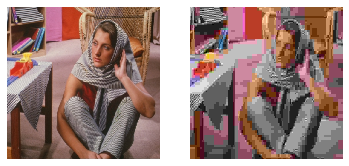

In [10]:
img = cv2.imread('barbara.jpg')
cv2.imwrite('/tmp/barbara_lq.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 0])
img_lq = cv2.imread('/tmp/barbara_lq.jpg')

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_lq, cv2.COLOR_BGR2RGB))
plt.axis('off')

#### PNG Images
When saving as PNG you may control the compression factor from 0 to 9 (higher the smaller size). Default is 3.

(-0.5, 219.5, 219.5, -0.5)

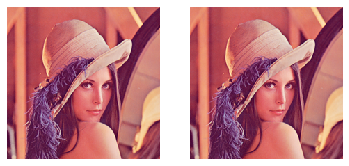

In [5]:
img = cv2.imread('lenna.png')
cv2.imwrite('/tmp/lenna_lq.png', img, [cv2.IMWRITE_PNG_COMPRESSION, 9])
img_lq = cv2.imread('/tmp/lenna_lq.png')

plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_lq, cv2.COLOR_BGR2RGB))
plt.axis('off')

### Video File
Similarly, images may be written to a video file. The encoding format is chosen using a fourcc. The full list may be seen on the [fourcc.org website](http://www.fourcc.org/codecs.php)

In [6]:
device = 0
cap = cv2.VideoCapture(device)

fps = 10.0
width = 640
height = 480

# Sizes must match
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

count = 50

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'AVC1')

out = cv2.VideoWriter('/tmp/video.mp4', fourcc, fps, (width,height))

while cap.isOpened() and count > 0:
    ret, frame = cap.read()
    if ret==False:
        print ("Error reading frame")
        break

    # write the flipped frame
    out.write(frame)
    count -= 1

# Release everything if job is finished
cap.release()
out.release()

## Data Manipulation
Images are loaded as arrays.

### Raw Indexing
Let's explore how to access data manually

#### Size of an image
The `shape` method provides an easy way to get the dimensions of an image. In the following examples, *barbara* is a 512x512 RGB image, while *diamond* is a 245x225 RGBA image.

In [11]:
barbara = cv2.imread('barbara.jpg', cv2.IMREAD_UNCHANGED)
print(barbara.shape)

diamond = cv2.imread('diamond.png', cv2.IMREAD_UNCHANGED)
print(diamond.shape)

(512, 512, 3)
(245, 225, 4)


#### Pixel access
To access an individual pixel we index the image as a regular array.

In [12]:
# Get the full RGB pixel
print(barbara[100, 200])

# Get the full RGB pixel, separated by components
(R, G, B) = barbara[100,200]
print("R: %d, G: %d, B: %d"%(R, G, B))

# Get each component independently
R = barbara[100,200,0]
G = barbara[100,200,1]
B = barbara[100,200,2]
print("R: %d, G: %d, B: %d"%(R, G, B))

[ 37  66 200]
R: 37, G: 66, B: 200
R: 37, G: 66, B: 200


#### Range access
Numpy allows you to index ranges. For example, the following syntax accesses ranges in the image

In [14]:
# Get the red component from column 100 to 110 on row 200
rng = barbara[100:110,200:201,0]
print (rng)

# Get the first 5 pixels of column 0
rng = barbara[0,0:5]
print (rng)

# Get the blue components of the first row
rng = barbara[:, 0, 2]
print (rng)

# Get the green channel of the image
rng = barbara[:,:,1]
print (rng)

[[37]
 [36]
 [36]
 [39]
 [39]
 [39]
 [40]
 [37]
 [33]
 [33]]
[[14 13 15]
 [13 15 16]
 [ 9 13 14]
 [11 16 15]
 [11 14 12]]
[ 15 101 130 133 122 125 142 139 123 134 164 169 162 164 180 185 180 189
 200 199 204 207 208 211 209 207 211 204 195 196 205 201 183 176 176 165
 142 141 156 162 161 159 169 175 175 181 178 161 156 151 131 122 106  85
  74  59  50  46  46  46  45  41  38  37  33  34  37  36  37  36  39  40
  41  44  47  46  46  45  45  46  47  52  58  85 126 163 190 200 197 186
 176 165 138 102  77  73  72  72  73  73  76  77  78  78  80  83  85  84
  84  84  83  83  82  83  85  86  86  85  88  90  85  87  91  93  94  93
  94  96  96  96  96  98 102 101 102 105 108 108 110 113 118 123 128 132
 135 139 143 145 147 149 152 154 156 156 157 158 160 161 163 166 176 188
 201 204 203 202 203 205 207 206 199 182 156 133 116 111 110 102  94  87
  79  85 105 146 169 186 192 188 184 190 192 190 194 204 201 199 208 206
 200 207 206 200 206 209 200 199 209 213 202 205 214 211 201 205 205 199
 1

#### Stepping
Numpy allows us to skip N items while accessing the array. For example:
```python
arr[a:b:c]
```
means, index from item `a` to item `b` in increments of `c` elements.

In [15]:
# Read the first 10 items of the first row, blue component
orig = barbara[0:10,0,2]
print (orig)

# Read the first 10 items of the first row, blue component, in increments of 2 elements
skip = barbara[0:10:2,0,2]
print(skip)

print("----")

# Read first row, red component
orig = barbara[:,0,0]
print (orig)

# Read first row, red component, in increments of 2 elements
skip = barbara[::2,0,0]
print(skip)

[ 15 101 130 133 122 125 142 139 123 134]
[ 15 130 122 142 123]
----
[ 14 100 129 132 123 126 145 142 126 137 165 170 159 161 177 182 175 182
 193 192 199 202 207 210 208 206 213 206 199 200 209 206 191 186 186 175
 153 152 167 173 174 172 184 190 191 197 194 177 171 166 146 137 121 100
  87  72  59  54  51  49  45  41  37  36  30  29  30  29  28  27  26  26
  24  27  26  25  25  24  23  22  20  21  25  45  80 111 133 140 134 123
 116 108  85  51  30  26  25  25  23  23  22  23  23  23  22  25  25  24
  25  25  22  24  25  28  29  30  30  29  31  33  28  30  30  30  28  27
  27  29  27  27  27  29  29  28  28  31  31  31  31  34  37  42  46  50
  51  55  58  60  62  64  67  69  71  71  70  71  72  73  75  80  92 110
 129 139 143 146 148 150 154 159 165 167 166 165 170 176 177 173 167 160
 148 143 148 174 184 193 193 188 184 190 188 186 192 202 197 195 204 202
 196 203 200 194 200 203 192 191 199 203 193 196 206 203 196 200 202 196
 188 195 198 190 188 197 200 188 190 200 204 190 177 18